**Importing the data from Kaggle API**




In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d ted8080/house-prices-and-images-socal


 99% 367M/369M [00:04<00:00, 113MB/s]
100% 369M/369M [00:04<00:00, 86.9MB/s]


In [ ]:
!unzip house-prices-and-images-socal.zip

**Importing Dependencies**

In [13]:
import pandas as pd
import numpy as np
import cv2 as cv
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input, Reshape, Dense, GlobalAveragePooling2D, Flatten
from keras.models import Model, save_model
from keras.callbacks import EarlyStopping

**Removing the unwanted images**

In [5]:
df=pd.read_csv("/content/socal2.csv")
df.head()
df2=df.drop([0,2,3,5,12,13,14,37,50,90,97,105,108,129,165,168,182,212,226,287,288,297,298,307,314,315,325,346,        358,365,366,368,373,379,380,382,391,402,413,423,432,433,443,448,458,466,467,477,482,488,490,491,492,493,        495,500,501,502,503,505,511,513,521,526,531,544,545,548,550,560,572,577,579,583,593,596,597,598,602,603,        604,615,617,627,628,632,634,638,662,663,664,680,682,688,717,747,748,752,784,798,799,807,810,822,826,840,        855,861,874,889,903,929,969,979,989,997,999,1000,1019,1020,1040,1047,1065,1067,1071,1081,1083,1088,1089,        1090,1103,1104,1108,1124,1128,1140,1174,1190,1204,1208,1214,1217,1227,1229,1234,1237,1238,1242,1263,1270,        1277,1303,1307,1310,1312,1318,1325,1326,1335,1347,1378,1397,1401,1403,1494,1497,1499,1502,1505,1508,1510,        1528,1531,1553,1561,1567,1581,1584,1592,1597,1607,1608,1614,1632,1643,1644,1645,1653,1655,1661,1668,1677,        1678,1687,1697,1699,1707,1725,1748,1775,1781,1793,1795,1805,1825,1826,1829,1834,1835,1856,1885,1888,1908,        1921,1943,1946,1949,1950,1953,1958,1974,1980,2020,2022,2026,2027,2030,2037,2047,2054,2055,2056,2057,2096,        2113,2114,2118,2120,2123,2130,2132,2133,2136,2142,2144,2149,2153,2154,2157,2159,2175,2182,2196,2199,2200,        2202,2204,2206,2210,2220,2228,2238,2239,2246,2266,2271,2282,2284,2285,2291,2293,2302,2307,2309,2321,2334,        2336,2337,2344,2345,2348,2351,2357,2367,2368,2373,2385,2387,2390,2399,2404,2412,2425,2426,2456,2458,2466,         2481,2485,2492,2495,2501,2503,2517,2523,2525,2535,2537,2545,2548,2554,2555,2556,2558,2574,2580,2599,2600,        2601,2606,2611,2616,2618,2619,2623,2632,2634,2637,2641,2648,2649,2662,2671,2676,2679,2683,2685,2693,2696,        2697,2703,2704,2711,2713,2729,2750,2751,2753,2754,2760,2763,2764,2765,2766,2767,2782,2783,2788,2791,2804,        2806,2811,2814,2823,2825,2833,2838,2845,2846,2855,2858,2859,2866,2869,2872,2874,2875,2881,2882,2892,2893,        2901,2906,2908,2909,2911,2914,2916,2918,2919,2924,2928,2931,2952,2954,2973,2981,2989,2998,3007,3008,3013,         3016,3017,3027,3029,3032,3044,3051,3052,3057,3058,3064,3068,3075,3083,3085,3092,3095,3098,3103,3105,3113,        3115,3123,3137,3143,3151,3154,3155,3163,3167,3173,3182,3192,3193,3194,3195,3196,3203,3208,3216,3217,3220,        3222,3225,3226,3229,3232,3233,3236,3238,3242,3244,3245,3246,3257,3260,3272,3273,3276,3278,3286,3292,3294,        3296,3297,3298,3302,3306,3308,3312,3315,3319,3328,3335,3337,3340,3343,3356,3360,3365,3366,3367,3374,3380,        3381,3384,3388,3390,3400,3410,3411,3412,3415,3416,3418,3420,3428,3429,3431,3435,3440,3441,3448,3449,3451,        3452,3454,3455,3460,3461,3464,3471,3474,3477,3480,3482,3483,3489,3490,3492,3495,3496,3497,3498,3499,3500,        3501,3502,3503,3505,3510,3511,3515,3516,3517,3518,3519,3521,3524,3530,3531,3532,3541,3545,3546,3551,3554,        3557,3558,3565,3569,3570,3575,3577,3580,3582,3585,3586,3587,3589,3590,3595,3599,3601,3603,3605,3612,3614,        3616,3625,3634,3637,3638,3639,3649,3651,3653,3655,3657,3668,3681,3682,3685,3686,3705,3714,3721,3722,3733,        3740,3742,3747,3749,3762,3772,3776,3780,3787,3795,3804,3805,3809,3812,3819,3824,3825,3838,3849,3854,3858,        3861,3863,3876,3879,3883,3886,3895,3899,3910,3917,3923,3925,3930,3932,3933,3936,3938,3945,3961,3963,3982,        3983,4000,4002,4008,4009,4012,4015,4020,4031,4033,4046,4048,4065,4066,4067,4070,4088,4089,4090,4104,4106,        4112,4118,4120,4121,4122,4124,4132,4133,4135,4166,4185,4189,4198,4205,4207,4219,4227,4228,4235,4237,4244,        4247,4255,4258,4264,4268,4272,4278,4285,4289,4310,4313,4314,4316,4328,4329,4335,4344,4348,4355,4356,4375,        4380,4387,4389,4395,4396,4408,4412,4419,4423,4426,4428,4435,4439,4456,4460,4468,4470,4471,4479,4485,4487,        4496,4500,4503,4507,4509,4511,4512,4522,4523,4533,4534,4535,4538,4540,4558,4562,4568,4574,4577,4579,4589,        4593,4594,4597,4598,4606,4611,4615,4616,4617,4618,4622,4638,4641,4646,4653,4654,4670,4671,4673,4677,4678,        4690,4697,4698,4703,4711,4714,4715,4716,4717,4718,4719,4720,4722,4723,4725,4730,4736,4744,4746,4748,4751,        4754,4755,4758,4767,4770,4773,4775,4776,4779,4781,4790,4798,4800,4805,4811,4812,4814,4815,4835,4840,4843,        4850,4852,4853,4855,4857,4860,4861,4872,4874,4881,4883,4890,4891,4892,4893,4895,4896,4898,4901,4903,4911,        4914,4923,4924,4925,4926,4927,4928,4929,4931,4936,4937,4938,4940,4943,4944,4945,4946,4949,4953,4957,4959,        4961,4962,4965,4968,4970,4972,4973,4977,4982,4984,4988,4989,4990,4993,4996,4999,5001,5002,5006,5007,5011,        5013,5014,5015,5017,5021,5022,5023,5028,5029,5031,5032,5034,5037,5038,5039,5040,5041,5042,5043,5044,5049,        5050,5051,5055,5058,5062,5064,5065,5066,5070,5072,5074,5075,5076,5077,5083,5084,5088,5089,5094,5098,5099,        5100,5101,5103,5106,5107,5108,5114,5117,5118,5119,5120,5121,5123,5124,5125,5129,5131,5134,5135,5136,5137,        5139,5148,5149,5151,5152,5154,5156,5157,5161,5163,5171,5172,5173,5174,5175,5177,5180,5189,5190,5191,5192,        5200,5208,5209,5212,5213,5214,5216,5218,5230,5231,5239,5242,5246,5262,5269,5271,5274,5288,5293,5296,5303,        5306,5307,5308,5312,5313,5317,5319,5329,5330,5341,5352,5368,5375,5376,5377,5396,5399,5403,5407,5409,5411,        5413,5417,5425,5427,5429,5430,5433,5445,5449,5457,5468,5470,5475,5486,5487,5488,5503,5507,5510,5511,5512,        5524,5530,5533,5542,5543,5550,5551,5558,5565,5567,5578,5580,5590,5591,5595,5603,5608,5622,5635,5640,5648,        5657,5677,5690,5701,5705,5708,5712,5713,5718,5719,5720,5722,5724,5725,5728,5739,5741,5742,5744,5745,5747,        5757,5760,5762,5773,5782,5786,5789,5804,5805,5827,5828,5832,5833,5844,5845,5847,5854,5856,5861,5862,5866,        5868,5875,5880,5906,5911,5912,5913,5919,5921,5924,5925,5930,5931,5932,5933,5934,5935,5941,5942,5949,5950,        5951,5952,5953,5955,5957,5983,5985,5997,6000,6002,6004,6009,6016,6026,6029,6031,6034,6047,6048,6052,6063,        6066,6103,6108,6109,6114,6115,6129,6134,6142,6165,6181,6221,6231,6250,6269,6272,6287,6296,6298,6304,6305,        6306,6322,6323,6340,6354,6355,6356,6368,6375,6379,6389,6390,6398,6400,6404,6406,6419,6421,6426,6432,6449,         6457,6466,6483,6488,6489,6500,6502,6503,6506,6509,6510,6511,6514,6524,6526,6542,6545,6546,6556,6568,6570,        6572,6582,6590,6592,6605,6607,6609,6617,6623,6624,6635,6636,6641,6648,6649,6657,6658,6662,6663,6666,6672,        6678,6684,6697,6698,6701,6702,6703,6706,6710,6714,6730,6735,6744,6748,6750,6751,6759,6769,6770,6778,6780,         6787,6790,6798,6802,6804,6805,6807,6809,6813,6817,6819,6821,6822,6826,6833,6835,6836,6848,6854,6859,6864,        6868,6872,6873,6879,6887,6893,6895,6897,6898,6899,6900,6901,6902,6929,6938,6939,6941,6947,6948,6964,6965,        6968,6969,6973,6982,6983,6986,6988,6992,6993,6994,6995,6999,7004,7006,7007,7012,7013,7015,7020,7029,7030,        7033,7034,7037,7038,7039,7040,7042,7045,7048,7060,7065,7066,7071,7085,7089,7090,7092,7093,7096,7097,7098,        7108,7113,7116,7120,7121,7124,7125,7142,7143,7144,7148,7154,7162,7163,7177,7179,7184,7185,7193,7198,7204,        7210,7211,7212,7231,7240,7247,7248,7252,7253,7254,7257,7265,7269,7276,7279,7286,7290,7291,7297,7303,7309,        7319,7321,7322,7323,7324,7325,7327,7333,7335,7336,7338,7343,7350,7352,7373,7374,7378,7386,7388,7390,7391,        7392,7403,7408,7416,7422,7424,7428,7433,7441,7443,7458,7470,7472,7474,7476,7481,7483,7484,7485,7488,7491,        7493,7495,7496,7518,7520,7523,7525,7526,7533,7535,7539,7540,7541,7542,7547,7549,7554,7555,7562,7564,7565,        7568,7570,7574,7579,7581,7583,7586,7589,7591,7592,7593,7606,7616,7619,7622,7627,7629,7632,7633,7634,7635,        7636,7637,7638,7639,7641,7642,7648,7649,7660,7664,7667,7670,7672,7677,7678,7680,7681,7682,7684,7685,7696,        7698,7699,7702,7703,7704,7707,7711,7714,7723,7727,7728,7729,7730,7733,7736,7738,7739,7743,7751,7753,7758,         7759,7761,7762,7772,7773,7787,7791,7794,7795,7798,7800,7808,7816,7817,7818,7820,7822,7823,7824,7826,7828,        7834,7835,7836,7837,7843,7848,7853,7854,7855,7869,7872,7874,7876,7877,7881,7882,7883,7885,7886,7887,7888,        7892,7893,7894,7895,7907,7914,7918,7921,7922,7929,7931,7932,7933,7934,7936,7941,7950,7951,7953,7954,7964,        7965,7968,7969,7970,7975,7976,7977,7978,7979,7980,7982,7983,7985,7986,7987,7991,7993,7995,7996,7997,7998,        7999,8001,8002,8003,8008,8009,8010,8016,8017,8020,8021,8023,8024,8025,8027,8028,8030,8031,8032,8034,8036,        8041,8043,8044,8045,8056,8057,8059,8063,8065,8068,8069,8070,8077,8081,8084,8087,8091,8095,8099,8114,8115,        8121,8130,8144,8145,8146,8153,8154,8155,8157,8173,8181,8185,8192,8193,8194,8195,8196,8197,8201,8210,8211,        8214,8219,8221,8223,8228,8229,8230,8237,8238,8241,8244,8246,8254,8256,8266,8271,8274,8275,8278,8280,8281,        8290,8294,8295,8298,8311,8317,8323,8339,8342,8346,8393,8395,8403,8417,8424,8428,8429,8438,8460,8469,8481,        8495,8508,8536,8556,8563,8572,8589,8632,8638,8644,8665,8694,8706,8709,8715,8722,8744,8747,8763,8764,8769,        8781,8786,8793,8794,8809,8821,8824,8830,8833,8845,8865,8886,8895,8900,8901,8907,8930,8931,8934,8942,8943,        8955,8960,8980,8989,8990,8992,8998,9007,9009,9013,9016,9049,9050,9057,9060,9062,9071,9081,9084,9085,9094,        9102,9118,9127,9130,9138,9140,9160,9163,9168,9179,9191,9194,9213,9218,9220,9222,9237,9240,9242,9269,9279,        9283,9296,9303,9312,9329,9332,9338,9345,9351,9372,9396,9414,9434,9441,9460,9487,9491,9492,9550,9572,9577,        9597,9618,9666,9676,9691,9701,9714,9716,9753,9766,9771,9772,9787,9825,9836,9841,9842,9847,9848,9849,9851,        9853,9854,9856,9864,9882,9884,9885,9002,9918,9955,9956,9963,9964,9965,9987,9993,9996,10000,10016,10020,        10072,10075,10082,10086,10091,10096,10105,10115,10116,10125,10145,10149,10163,10167,10169,10173,10181,        10183,10185,10194,10226,10227,10241,10248,10256,10260,10261,10268,10270,10294,10298,10307,10316,10320,        10322,10330,10357,10366,10375,10403,10412,10417,10420,10431,10442,10445,10451,10462,10465,10473,10483,        10488,10493,10497,10510,10576,10579,10583,10588,10591,10592,10593,10603,10604,10609,10611,10641,10645,        10655,10658,10668,10670,10687,10693,10697,10698,10700,10702,10703,10704,10706,10708,10709,10710,10720,        10725,10726,10727,10729,10731,10732,10734,10738,10741,10747,10748,10749,10754,10755,10757,10758,10760,        10761,10762,10770,10771,10772,10777,10779,10786,10793,10794,10797,10801,10802,10807,10811,10812,10814,         10815,10817,10818,10819,10821,10822,10829,10833,10834,10835,10836,10839,10842,10843,10846,10851,10857,        10858,10869,10870,10877,10879,10881,10882,10886,10887,10888,10889,10893,10894,10898,10899,10901,10905,        10909,10910,10912,10915,10917,10922,10923,10924,10927,10935,10936,10941,10950,10953,10959,10960,10962,        10971,10972,10974,10975,10976,10982,10983,10987,10992,11000,11002,11003,11012,11013,11019,11020,11022,        11023,11025,11031,11032,11033,11035,11047,11051,11057,11059,11060,11062,11064,11069,11080,11081,11083,        11084,11089,11090,11091,11092,11093,11095,11100,11102,11104,11106,11110,11113,11114,11117,11118,11128,        11138,11140,11143,11145,11147,11152,11153,11154,11157,11158,11168,11173,11175,11182,11185,11190,11192,        11194,11198,11203,11205,11209,11210,11212,11215,11217,11218,11222,11224,11225,11227,11229,11231,11240,        11250,11255,11261,11265,11267,11268,11269,11270,11272,11274,11277,11278,11280,11281,11282,11283,11285,        11287,11288,11289,11291,11292,11294,11296,11299,11300,11301,11302,11304,11306,11307,11308,11310,11311,        11313,11315,11320,11326,11328,11330,11331,11332,11333,11338,11340,11344,11350,11352,11354,11356,11364,        11365,11368,11371,11376,11386,11393,11394,11395,11397,11399,11400,11402,11403,11405,11412,11415,11416,        11418,11419,11421,11422,11431,11436,11440,11442,11443,11445,11447,11451,11456,11457,11459,11461,11462,        11463,11468,11469,11470,11481,11485,11486,11487,11488,11492,11493,11495,11497,11501,11508,11510,11513,        11514,11515,11516,11517,11521,11523,11525,11528,11531,11532,11537,11539,11547,11550,11553,11561,11567,        11569,11571,11572,11586,11593,11594,11596,11598,11600,11602,11603,11605,11608,11614,11621,11630,11663,        11637,11644,11650,11652,11654,11659,11663,11664,11667,11670,11675,11676,11680,11684,11685,11686,11701,        11703,11710,11713,11714,11715,11716,11729,11732,11737,11739,11741,11744,11747,11755,11761,11767,11770,        11776,11777,11780,11782,11786,11787,11793,11795,11798,11799,11802,11811,11815,11821,11822,11830,11833,        11836,11837,11840,11841,11844,11845,11847,11849,11865,11867,11876,11886,11894,11897,11902,11917,11919,        11923,11924,11927,11932,11933,11934,11935,11936,11938,11939,11942,11949,11956,11957,11958,11967,11970,        11976,11978,11980,11982,11984,11992,11996,11997,11998,11999,12003,12005,12006,12010,12017,12024,12035,        12037,12038,12041,12055,12066,12069,12070,12071,12072,12074,12075,12080,12087,12090,12104,12106,12107,        12109,12111,12112,12116,12120,12126,12130,12144,12146,12150,12154,12163,12169,12171,12183,12184,12186,        12189,12195,12198,12205,12208,12214,12219,12223,12228,12229,12231,12232,12234,12237,12249,12252,12256,        12260,12267,12270,12271,12273,12274,12275,12276,12280,12285,12289,12290,12294,12295,12298,12301,12304,        12306,12307,12308,12310,12313,12316,12319,12325,12326,12332,12339,12340,12344,12345,12349,12352,12355,        12357,12361,12363,12365,12377,12378,12380,12382,12386,12387,12394,12397,12399,12423,12429,12431,12434,        12441,12443,12446,12448,12449,12451,12453,12456,12462,12463,12466,12475,12479,12485,12486,12493,12498,        12503,12506,12514,12522,12523,12525,12529,12531,12542,12547,12549,12550,12554,12558,12559,12564,12569,        12575,12581,12582,12588,12590,12595,12596,12598,12599,12605,12613,12619,12623,12627,12631,12632,12634,        12642,12657,12660,12666,12669,12670,12676,12677,12682,12685,12686,12687,12690,12697,12704,12708,12710,         12711,12723,12725,12730,12743,12746,12749,12752,12754,12758,12759,12761,12763,12764,12772,12781,12785,        12786,12788,12794,12795,12800,12802,12804,12806,12812,12813,12819,12830,12832,12839,12841,12843,12848,        12849,12858,12861,12863,12865,12869,12873,12874,12875,12879,12880,12889,12889,12906,12922,12923,12925,        12926,12932,12937,12938,12947,12955,12956,12958,12962,12978,12988,12992,13002,13010,13019,13020,13026,        13037,13038,13039,13040,13050,13055,13058,13062,13063,13064,13065,13068,13070,13072,13076,13077,13080,        13081,13089,13090,13099,13101,13105,13016,13111,13112,13113,13114,13126,13131,13141,13142,13148,13149,        13155,13156,13171,13178,13179,13190,13197,13199,13215,13223,13229,13231,13235,13237,13238,13240,13244,        13245,13250,13254,13256,13260,13262,13264,13265,13266,13269,13270,13271,13277,13289,13293,13294,13295,        13296,13301,13308,13311,13312,13320,13321,13322,13326,13331,13332,13334,13337,13339,13344,13348,13354,        13355,13360,13362,13363,13370,13386,13387,13390,13410,13413,13419,13424,13439,13443,13445,13448,13449,        13455,13457,13459,13460,13461,13482,13484,13490,13491,13492,13495,13502,13506,13507,13509,13511,13513,        13515,13516,13524,13530,13531,13532,13533,13537,13540,13544,13547,13552,13555,13559,13566,13570,13571,        13572,13573,13575,13578,13580,13582,13587,13595,13598,13602,13633,13637,13640,13673,13674,13680,13681,        13693,13697,13700,13709,13718,13732,13736,13744,13750,13751,13754,13764,13769,13780,13786,13787,13796,        13805,13806,13815,13821,13823,13827,13831,13835,13837,13843,13844,13856,13877,13887,13900,13908,13909,        13912,13918,13922,13933,13948,13952,13962,13988,13989,13996,13999,14007,14008,14010,14017,14024,14032,        14034,14044,14050,14051,14054,14067,14078,14079,14082,14101,14105,14107,14121,14123,14124,14125,14127,        14128,14139,14140,14145,14150,14174,14175,14176,14184,14186,14188,14190,14197,14201,14202,14224,14229,        14238,14249,14254,14256,14257,14258,14268,14269,14270,14280,14282,14287,14307,14308,14309,14311,14330,        14342,14343,14344,14345,14346,14347,14353,14355,14356,14358,14360,14362,14363,14371,14372,14468,14476,        14481,14495,14504,14519,14529,14533,14541,14551,14555,14564,14566,14567,14580,14581,14583,14593,14599,        14603,14604,14611,14621,14622,14624,14628,14682,14683,14687,14695,14697,14699,14704,14705,14706,14708,         14715,14733,14753,14766,14767,14769,14784,14785,14786,14787,14790,14792,14796,14797,14798,14809,14810,        14813,14816,14837,14839,14840,14842,14875,14878,14896,14903,14911,14929,14938,14940,14941,14957,14969,        14971,14989,14991,15020,15023,15031,15045,15055,15060,15072,15089,15124,15135,15145,15149,15155,15156,        15158,15161,15162,15179,15180,15190,15213,15214,15217,15218,15223,15229,15233,15248,15264,15269,15270,        15273,15275,15280,15288,15304,15312,15325,15337,15338,15343,15345,15346,15356,15360,15368,15371,15375,        15376,15377,15378,15382,15383,15390,15391,15398,15402,15405,15407,15408,15411,15412,15415,15420,15433,        15434,15411,15448,15451,15453,15454,15456,15461,15465,15468,15471,15473])
len(df2["image_id"]) - len(df["image_id"])

df2.to_csv("socal_fixed.csv")

df2.to_csv(r'socal_fixed.txt', header=None, index=None, sep=' ', mode='a')


**Reading the dataset**

In [6]:
df = pd.read_csv("/content/socal_fixed.csv")

**Displaying the top 5 rows of dataset**

In [8]:
df.head()

,Unnamed: 0,image_id,street,citi,n_citi,bed,bath,sqft,price
0,1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
1,4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
2,6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000
3,7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000
4,8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000


**Reading the image data**

In [7]:
image_data = []
for img_id in df["image_id"]:
  for img_name in os.listdir("/content/socal2/socal_pics"):
    if (str(img_id)+".jpg") == img_name:
      img = cv.imread("/content/socal2/socal_pics/" + str(img_id)+".jpg")
      img = cv.resize(img, (64,64))
      img = img/255
      image_data.append(img)

**Converting images list into numpy array**

In [8]:
image_data = np.array(image_data)

**Shape of the images**

In [9]:
image_data.shape

(12518, 64, 64, 3)

**Plotting the images in the dataset**

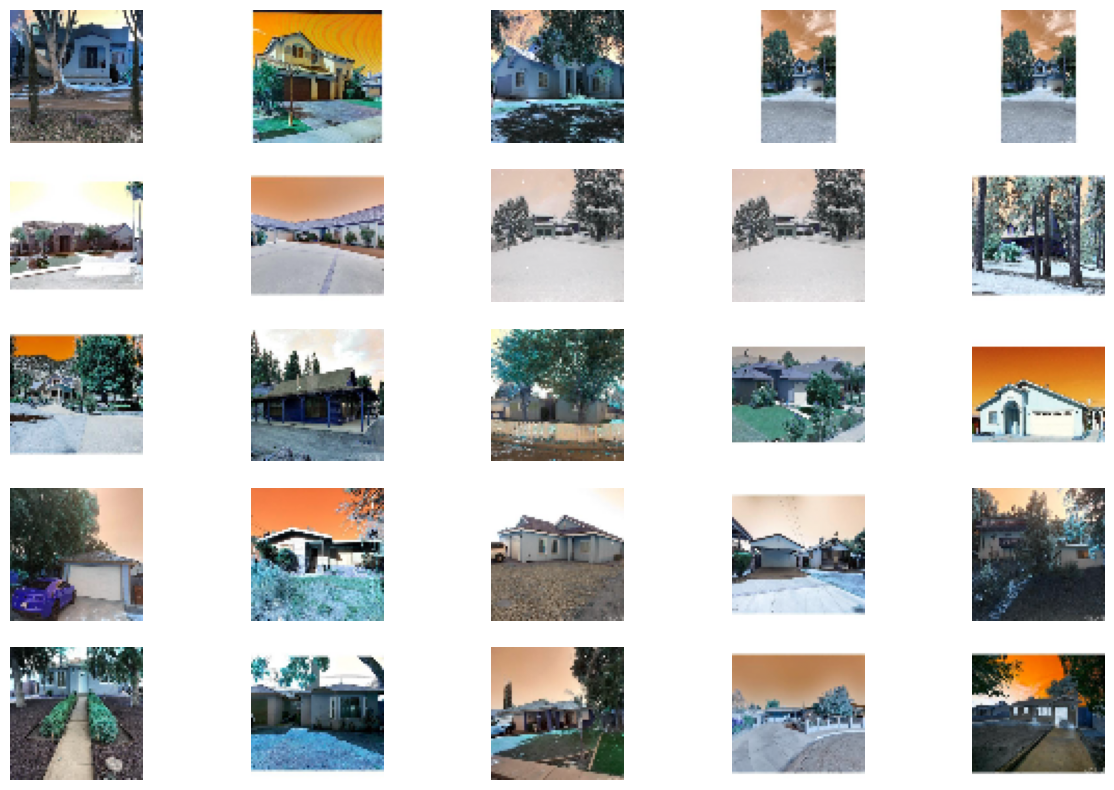

In [10]:
plt.figure(figsize=(15,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(image_data[i], cmap='gray')
  plt.axis("off")
plt.show()

**Model Building**

In [11]:

input_layer = Input(shape=(64, 64, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Bottleneck layer
x = Flatten()(x)
bottleneck_layer = Dense(5, activation='relu')(x)

# Decoder
x = Dense(128 * 8 * 8, activation='relu')(bottleneck_layer)
x = Reshape((8, 8, 128))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded_layer = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)  # Output with 3 channels


autoencoder = Model(input_layer, decoded_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


**Summary of the Model**

In [12]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856 

**Creating Callback**

In [14]:
callback = EarlyStopping(monitor="loss", mode="min", patience=3)

**Training the model**

In [15]:
history = autoencoder.fit(image_data, image_data, epochs=50, callbacks=[callback])

Epoch 1/50
392/392 [==============================] - 18s 13ms/step - loss: 0.0541
Epoch 2/50
392/392 [==============================] - 5s 13ms/step - loss: 0.0461
Epoch 3/50
392/392 [==============================] - 4s 11ms/step - loss: 0.0447
Epoch 4/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0441
Epoch 5/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0438
Epoch 6/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0436
Epoch 7/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0435
Epoch 8/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0433
Epoch 9/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0433
Epoch 10/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0430
Epoch 11/50
392/392 [==============================] - 4s 11ms/step - loss: 0.0428
Epoch 12/50
392/392 [==============================] - 5s 12ms/step - loss: 0.0427
Epoch 13/50


**Plotting the loss curves**

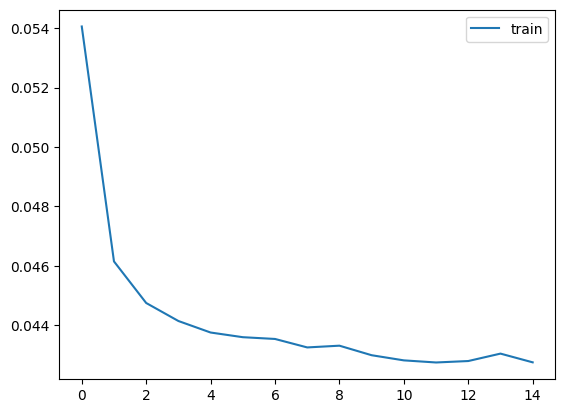

In [16]:
plt.plot(history.history["loss"])
plt.legend(["train"])
plt.show()

**Creating the BottleNeck Model**

In [17]:
bottleneck = Model(inputs=input_layer, outputs=[bottleneck_layer])

**Saving the model**

In [20]:
bottleneck.save_weights("BottleNeck_Model_weights.h5")

In [19]:
save_model(bottleneck, "bottleneck.h5")

<ipython-input-19-afe90ec9f121>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(bottleneck, "bottleneck.h5")


In [21]:
df.head()

,Unnamed: 0,image_id,street,citi,n_citi,bed,bath,sqft,price
0,1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
1,4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100
2,6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000
3,7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000
4,8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000


In [25]:
predictions = bottleneck.predict(image_data)

392/392 [==============================] - 1s 2ms/step


In [34]:
predictions

array([[0.        , 0.05445722, 0.        , 0.        , 0.16760284],
       [0.        , 0.4966998 , 0.        , 0.        , 0.479637  ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.9451351 , 0.        , 0.        , 2.0054793 ],
       [0.        , 1.4327193 , 0.        , 0.        , 1.6518914 ],
       [0.        , 1.0134453 , 0.        , 0.        , 2.027276  ]],
      dtype=float32)

In [36]:
df["img_f1"] = predictions[:,0]
df["img_f2"] = predictions[:,1]
df["img_f3"] = predictions[:,2]
df["img_f4"] = predictions[:,3]
df["img_f5"] = predictions[:,4]

In [37]:
df.head()

,Unnamed: 0,image_id,street,citi,n_citi,bed,bath,sqft,price,img_f1,img_f2,img_f3,img_f4,img_f5
0,1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500,0.0,0.054457,0.0,0.0,0.167603
1,4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100,0.0,0.496700,0.0,0.0,0.479637
2,6,6,1100 CAMILIA Street,"Calexico, CA",55,4,3.0,2769,415000,0.0,0.000000,0.0,0.0,0.000000
3,7,7,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,0.0,5.809244,0.0,0.0,1.086153
4,8,8,803 Chaparral Court,"Brawley, CA",48,5,2.1,2600,545000,0.0,5.809244,0.0,0.0,1.086153


In [39]:
df.to_csv("final_df.csv", index=False, header=df.columns)